# Analyzing Customer Sentiment and Performance of Quick Commerce Platforms

## Project Description  

This project focuses on analyzing customer reviews and ratings for three major quick commerce platforms—**BlinkIt, Zepto, and JioMart**. With the rapid rise of instant delivery services, user experience plays a crucial role in business sustainability. This dataset provides a unique opportunity to compare all three platforms based on customer sentiment and rating points.  

### Key Objectives:  
- **Compare platform performance** based on user ratings.   
- **Analyze sentiment trends** across different platforms.   

By leveraging **Natural Language Processing (NLP)** techniques such as sentiment analysis, keyword extraction, and topic modeling, we aim to extract meaningful insights from user feedback. This analysis will help quick commerce platforms understand their weaknesses, enhance customer satisfaction, and create a competitive edge in the growing market. 

## READING PROJECT FILE

In [1]:
import pandas as pd

df=pd.read_csv('reviews.csv')
print(df.head().to_string(index=False))

 rating             date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      review platform
      2 30 December 2024                                                                                                                                                                                                        I was using it for long time, but have to stop using it because\n                recently I got a used ite

In [2]:
df['rating'].value_counts()

1    3305
5     623
2     279
4     225
3     188
Name: rating, dtype: int64

## DROPPING UNWANTED COLUMNS

In [3]:
df=df.drop(columns="date")
print(df.head().to_string(index=False))

 rating                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      review platform
      2                                                                                                                                                                                                        I was using it for long time, but have to stop using it because\n                recently I got a used item and when I talked to support tea

## Now we do some EDA on this dataset for better understanding the dataset.

In [4]:
df.describe()

,rating
count,4620.000000
mean,1.827273
std,1.461208
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rating    4620 non-null   int64 
 1   review    4620 non-null   object
 2   platform  4620 non-null   object
dtypes: int64(1), object(2)
memory usage: 108.4+ KB


In [6]:
print(df.isnull().sum())

rating      0
review      0
platform    0
dtype: int64


## DETECTING NON-ENGLISH COMMENTS

In [7]:
from langdetect import detect

def is_english(text):
    try:
        return detect(text) == 'en'  
    except:
        return False 

df_non_english = df[~df['review'].apply(is_english)]  
df_english = df[df['review'].apply(is_english)]  

print(f"Total non-English comments: {len(df_non_english)}") 

Total non-English comments: 2


In [8]:
df=df_english

## REMOVING PUNCTUATIONS & EMOJIS

In [9]:
import re


def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text) 
    return text

df['review'] = df['review'].apply(clean_text)

print(df.head()) 

   rating                                             review platform
0       2  I was using it for long time but have to stop ...  blinkit
1       1  Loving the fast deliveries and mostly they are...  blinkit
2       1  The customer support is very disappointing I r...  blinkit
3       5  Ive been using Blinkit for a while now and it ...  blinkit
4       2  Blinkit was my go to app and it was rare that ...  blinkit


## LOWERING COMMENTS

In [10]:
df['review']=df['review'].str.lower()
print(df.head())

   rating                                             review platform
0       2  i was using it for long time but have to stop ...  blinkit
1       1  loving the fast deliveries and mostly they are...  blinkit
2       1  the customer support is very disappointing i r...  blinkit
3       5  ive been using blinkit for a while now and it ...  blinkit
4       2  blinkit was my go to app and it was rare that ...  blinkit


## REMOVING STOPWORDS

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

stop_words.discard('not') 

def clean_text(text):
    words = nltk.word_tokenize(text)
    cleaned_words = [
        lemmatizer.lemmatize(word) for word in words if word not in stop_words and word.isalpha()
    ]
    return ' '.join(cleaned_words)

df['review'] = df['review'].apply(clean_text)

print(df.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sunit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sunit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sunit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


   rating                                             review platform
0       2  using long time stop using recently got used i...  blinkit
1       1  loving fast delivery mostly great quick delive...  blinkit
2       1  customer support disappointing recently bought...  blinkit
3       5  ive using blinkit become goto app grocery shop...  blinkit
4       2  blinkit go app rare disappointed mebut today d...  blinkit


In [12]:
print(df['platform'].isna().sum())


0


In [13]:
print(df['platform'].nunique())


3


## ENCODING

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

df['platform'] = df['platform'].fillna("Unknown") 
ct = ColumnTransformer(
    transformers=[
        ('platform', OneHotEncoder(drop='first', handle_unknown='ignore'), ['platform'])
    ], remainder='passthrough'
)
X_platform = ct.fit_transform(df)

print(X_platform.shape) 


(4618, 4)


## TOKENIZING

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
vocab_size = 2000  
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df['review'])
X_tokens = tokenizer.texts_to_sequences(df['review'])
print(f"Total unique words: {len(tokenizer.word_index)}")  
print(f"Words kept: {vocab_size}")  

Total unique words: 8280
Words kept: 2000


## FINDING FREQUENCY

In [16]:
word_counts = tokenizer.word_counts 
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True) 
excluded_words = sorted_word_counts[vocab_size:] 
import pandas as pd
df_excluded = pd.DataFrame(excluded_words, columns=['Word', 'Frequency'])
print(df_excluded.head(20))

             Word  Frequency
0   clarification          5
1         chennai          5
2            gate          5
3         chilled          5
4           forum          5
5         million          5
6        relative          5
7           white          5
8         urgency          5
9       alternate          5
10         travel          5
11       attached          5
12        recived          5
13         slowly          5
14     reflecting          5
15       speaking          5
16         bhopal          5
17       costlier          5
18          theme          5
19            wil          5


## ZERO PADDING

In [17]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
comment_lengths = [len(seq) for seq in X_tokens]
print(f"Max comment length: {np.max(comment_lengths)}")
print(f"Average comment length: {np.mean(comment_lengths)}")
print(f"90th percentile length: {np.percentile(comment_lengths, 90)}")

Max comment length: 62
Average comment length: 29.30272845387614
90th percentile length: 46.0


In [18]:
maxlen = 46 
X_padded = pad_sequences(X_tokens, maxlen=maxlen, padding='post', truncating='post')
print(f"Padded sequences shape: {X_padded.shape}")

Padded sequences shape: (4618, 46)


In [19]:
X_padded_df = pd.DataFrame(X_padded, index=df.index)  
X_platform_df = pd.DataFrame(X_platform, index=df.index) 
df_new = pd.concat([X_padded_df, X_platform_df], axis=1)

In [20]:
print(pd.DataFrame(X_padded).head(10).to_string())

     0    1    2     3     4     5    6    7     8     9    10   11   12   13   14    15   16   17    18    19    20    21   22    23   24    25    26   27    28   29    30   31    32   33    34   35   36   37    38   39   40    41  42   43   44   45
0    74  267    9   433    74   221   39  122     8   973   18   75   99  314    1   420    7  767   420  1330   561    25  110    47    1   319   462   17    59   17   361  405   792  421     0    0    0    0     0    0    0     0   0    0    0    0
1  1759  106    5   692   142   170    5  138   255    47  792   71  174  125  125   974  348   21    71   289   114   512    6    33    4    76     1    6  1331  108   362  153   108   25  1008  468  395    0     0    0    0     0   0    0    0    0
2     6   18  172   221   495   655    7  390  1105   150  202  329    6   18   84     1   99  114  1144   185   847  1249  159  1507  513   463   634    1    21  768    48  102   593  222   479    2  375    6    33    1   36   679   1    0    0  

## BUILDING MODEL

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_model(vocab_size, embedding_dim=100, max_length=50):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
    model.add(GRU(128, return_sequences=False)) 
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    
    return model

In [22]:
df

,rating,review,platform
0,2,using long time stop using recently got used i...,blinkit
1,1,loving fast delivery mostly great quick delive...,blinkit
2,1,customer support disappointing recently bought...,blinkit
3,5,ive using blinkit become goto app grocery shop...,blinkit
4,2,blinkit go app rare disappointed mebut today d...,blinkit
...,...,...,...
4615,1,deposited zepto wallet order watch depositing ...,zepto
4616,4,price r competitive certain item not packing g...,zepto
4617,1,worst delivery ever delivered broken product s...,zepto
4618,5,great experience zepto quality level faster de...,zepto


## DEFINING TRAINING AND TESTING DATA

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical 
X = df_new   
y = df['rating'] - 1  
y = to_categorical(y, num_classes=5)


In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
X_padded_df = X_padded_df.astype(np.float32)  
for col in X_platform_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_platform_df[col] = le.fit_transform(X_platform_df[col])

X_platform_df = X_platform_df.astype(np.float32) 

df_new = pd.concat([X_padded_df, X_platform_df], axis=1)

X = df_new.to_numpy(dtype=np.float32)

y = df['rating'].values - 1  

y = to_categorical(y, num_classes=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_int = np.argmax(y_train, axis=1)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train_int)
y_resampled = to_categorical(y_resampled, num_classes=5)

print("Resampled train shape:", X_resampled.shape, y_resampled.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Resampled train shape: (13235, 50) (13235, 5)
Test set shape: (924, 50) (924, 5)


In [25]:
vocab_size = 10000
embedding_dim = 100
max_length = 50
model = build_model(vocab_size, embedding_dim, max_length)
history = model.fit(
    X_train, y_train, 
    epochs=10, 
    batch_size=32, 
    validation_data=(X_test, y_test)
)


Epoch 1/10


c:\Users\sunit\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


116/116 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.7479 - loss: 0.8422 - val_accuracy: 0.9978 - val_loss: 0.0359
Epoch 2/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9989 - loss: 0.0116 - val_accuracy: 0.9989 - val_loss: 0.0045
Epoch 3/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9989 - val_loss: 0.0047
Epoch 4/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 1.0000 - loss: 3.4788e-04 - val_accuracy: 0.9989 - val_loss: 0.0043
Epoch 5/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 1.0000 - loss: 2.3983e-04 - val_accuracy: 0.9989 - val_loss: 0.0044
Epoch 6/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 1.0000 - loss: 1.6468e-04 - val_accuracy: 0.9989 - val_loss: 0.0049
Epoch 7/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 1.0000 - loss: 1.1192e-04 - val_accuracy: 0.9989 - val_loss: 0.0048
Epoch 8/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 1.0000 - loss: 7.9451e-05 -

In [26]:
X_train = np.clip(X_train, 0, 2000 - 1) 
X_test = np.clip(X_test, 0, 2000 - 1)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 1.0000 - loss: 5.3646e-05 - val_accuracy: 0.9989 - val_loss: 0.0049
Epoch 2/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 1.0000 - loss: 5.1101e-05 - val_accuracy: 0.9989 - val_loss: 0.0051
Epoch 3/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 1.0000 - loss: 2.7970e-05 - val_accuracy: 0.9989 - val_loss: 0.0054
Epoch 4/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 1.0000 - loss: 2.6062e-05 - val_accuracy: 0.9989 - val_loss: 0.0055
Epoch 5/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 1.0000 - loss: 2.5492e-05 - val_accuracy: 0.9989 - val_loss: 0.0057
Epoch 6/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 1.0000 - loss: 1.9325e-05 - val_accuracy: 0.9989 - val_loss: 0.0057
Epoch 7/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 1.0000 - loss: 1.8571e-05 - val_accuracy: 0.9989 - val_loss: 0.0058
Epoch 8/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 1.00

## Accuracy Score

In [27]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9997 - loss: 0.0015   
Test Loss: 0.005739150103181601
Test Accuracy: 0.9989177584648132


## Checking Accuracy using Confusion Matrix 

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


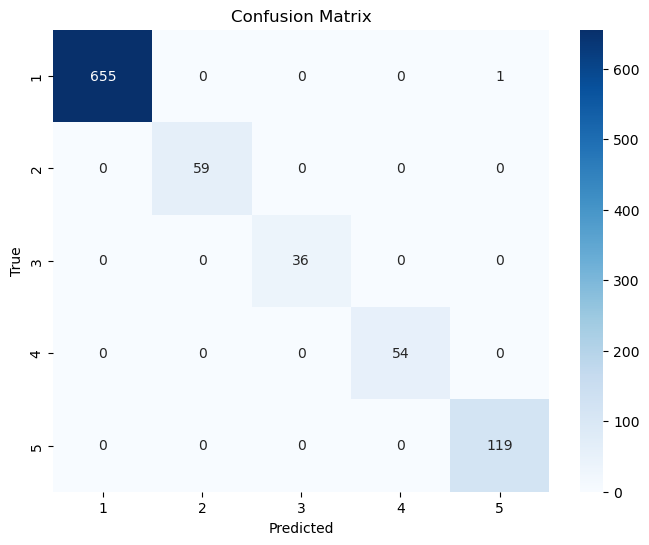

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
y_pred_labels = y_pred.argmax(axis=1)
y_test_labels = y_test.argmax(axis=1)
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [29]:
print(y_pred)

[[9.9999940e-01 6.1695249e-07 5.8737321e-11 2.4382389e-09 7.2366196e-11]
 [5.1269872e-13 5.5110142e-11 8.5612046e-06 3.2852599e-06 9.9998808e-01]
 [9.9999893e-01 1.0289602e-06 6.1297460e-11 3.6605634e-09 7.7689112e-11]
 ...
 [1.4459856e-05 9.9996877e-01 5.1153911e-06 1.1692451e-05 1.7025382e-09]
 [8.0093940e-08 5.6601425e-06 3.6861923e-06 9.9998391e-01 6.6899411e-06]
 [9.9999976e-01 2.6127080e-07 1.5098986e-11 9.9870667e-10 1.9616654e-11]]


## REPORT

In [30]:
from sklearn.metrics import classification_report

# Get the classification report
class_report = classification_report(y_test_labels, y_pred_labels)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       656
           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        54
           4       0.99      1.00      1.00       119

    accuracy                           1.00       924
   macro avg       1.00      1.00      1.00       924
weighted avg       1.00      1.00      1.00       924



## Conclusion  

The results of the sentiment classification model indicate exceptionally high accuracy, with precision, recall, and F1-scores achieving nearly perfect values across all sentiment categories. This demonstrates the model's effectiveness in distinguishing between different sentiment classes and correctly classifying user reviews.  

### Key Findings:  
- The model exhibits strong performance across all sentiment categories, ensuring a high level of reliability in analyzing customer feedback.  
- With minimal misclassification, the model accurately captures customer sentiment, providing a clear understanding of user experiences.  
- The analysis offers valuable insights into customer dissatisfaction and areas for improvement for platforms like BlinkIt, Zepto, and JioMart.  
- These insights can be leveraged to enhance customer satisfaction, optimize service quality, and address key operational challenges.  

### Recommendations for Further Improvement:  
- **Evaluate Overfitting**: The high accuracy suggests the need for additional validation on unseen data to ensure generalizability.  
- **Model Optimization**: Implementing regularization techniques or reducing model complexity could help mitigate potential overfitting.  
- **Expand Dataset**: Incorporating a more diverse and extensive dataset can improve the model's ability to generalize across different review patterns.  
- **Deeper Sentiment Insights**: Using advanced techniques such as topic modeling or aspect-based sentiment analysis can help extract more detailed insights into specific customer concerns.  

This study provides a comprehensive understanding of user sentiment, offering a data-driven approach to improving service quality and user experience in the quick commerce sector.
